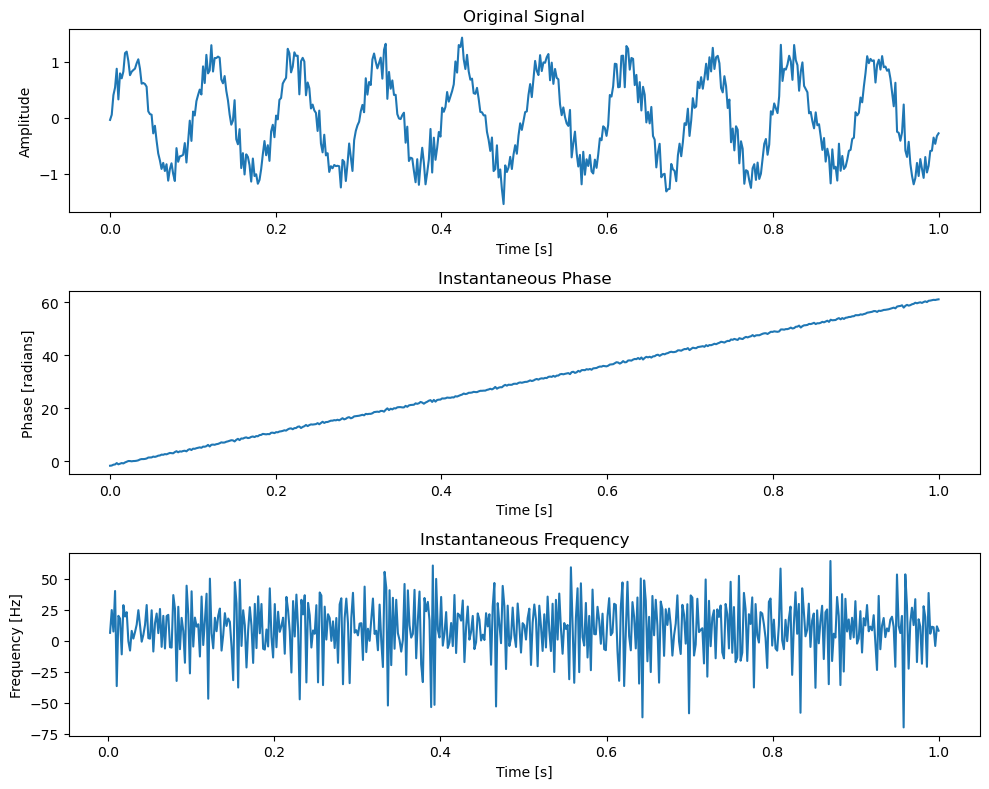

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

t = np.linspace(0, 1.0, 500)
freq = 5  # frequency of the sinusoid
channel_signal = np.sin(2 * np.pi * 10 * t) + 0.2 * np.random.normal(size=t.shape) #Deliberately generating a noisy signal

#Using Hilbert Transformation
analytic_signal = hilbert(channel_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_amplitude = np.abs(analytic_signal)

#Computing the decomposition using the formula
instantaneous_frequency = np.diff(instantaneous_phase) / (2.0 * np.pi * np.diff(t))

plt.figure(figsize=(10, 8))

# Plot channel signal
plt.subplot(3, 1, 1)
plt.plot(t, channel_signal, label="Original Signal")
plt.title("Original Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

# Plot instantaneous phase
plt.subplot(3, 1, 2)
plt.plot(t, instantaneous_phase, label="Instantaneous Phase")
plt.title("Instantaneous Phase")
plt.xlabel("Time [s]")
plt.ylabel("Phase [radians]")

# Plot instantaneous frequency
plt.subplot(3, 1, 3)
plt.plot(t[1:], instantaneous_frequency, label="Instantaneous Frequency")
plt.title("Instantaneous Frequency")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")

plt.tight_layout()
plt.show()

In [75]:
def phase_space_reconstruction(channel_signal, tau, m):
    n_samples = len(channel_signal)
    phase_space = np.empty((n_samples - (m - 1) * tau, m))

    for i in range(m):
        phase_space[:, i] = channel_signal[i * tau : n_samples - (m - 1 - i) * tau]
        
    return phase_space
tau = 10 #Delay parameter 
m = 3 #embedding dimension 

phase_space = phase_space_reconstruction(channel_signal, tau, m)
phase_space.shape

(480, 3)

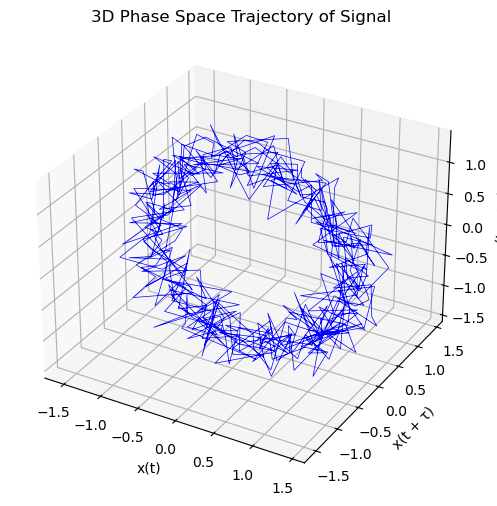

In [83]:
#plotting in a 3d space
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(phase_space[:, 0], phase_space[:, 1], phase_space[:, 2], lw=0.5, color='b')
ax.set_title('3D Phase Space Trajectory of Signal')
ax.set_xlabel('x(t)')
ax.set_ylabel('x(t + τ)')
ax.set_zlabel('x(t + 2τ)')
plt.grid()
plt.show()

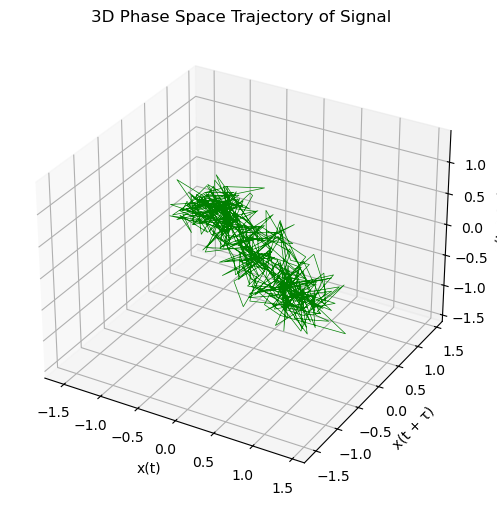

In [85]:
#Another value of delay parameters
tau1 = tau = 20
m = 3
phase_space_1 = phase_space_reconstruction(channel_signal, tau1, m)
phase_space_1.shape

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(phase_space_1[:, 0], phase_space_1[:, 1], phase_space_1[:, 2], lw=0.5, color='g')
ax.set_title('3D Phase Space Trajectory of Signal')
ax.set_xlabel('x(t)')
ax.set_ylabel('x(t + τ)')
ax.set_zlabel('x(t + 2τ)')
plt.grid()
plt.show()
